



\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#
#     PART B Section I       # 
\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#
  

In [0]:
# Importation of libraries (incuding tensorflow and keras)
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing
import h5py

import numpy as np
import matplotlib.pyplot as plt

# read data
from google.colab import drive
drive.mount('/content/gdrive')
!unzip "/content/gdrive/My Drive/Colab Notebooks/data.zip"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Archive:  /content/gdrive/My Drive/Colab Notebooks/data.zip
  inflating: data.h5                 


In [0]:

# loadData is a function which load the dataset and split into training/test images and labels
def loadData():
  with h5py.File('data.h5','r') as hf:
    print('List of arrays in this file: \n', hf.keys())
    allTrain = hf.get('trainData')
    allTest = hf.get('testData')
    npTrain = np.array(allTrain)
    npTest = np.array(allTest)
    print('Shape of the array dataset_1: \n', npTrain.shape)
    print('Shape of the array dataset_2: \n', npTest.shape)
    return npTrain[:,:-1], npTrain[:, -1], npTest[:,:-1], npTest[:, -1]



In [0]:

# Load the data
x_train, y_train, x_test, y_test = loadData()

# Build the keras neronal network model:
# Here, there are 2 layers:
#   1st layer of 512 fully-connected neurons with a relu activation 
#   2nd layer of 10 fully-connected neurons with a softmax activation 
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# the model is configured for training with the those parameters:
#   For the optimizer: Adam Optimization algorithm
#   For the loss: the sparse categorical cross entropy
#   The metric to be evaluated by the model: accuracy 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

List of arrays in this file: 
 KeysView(<HDF5 file "data.h5" (mode r)>)
Shape of the array dataset_1: 
 (200000, 785)
Shape of the array dataset_2: 
 (17000, 785)
Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# the model is trained with the those parameters:
#   epoch: 3 iterations
#   batch_size: the size of the mini batch which contains 256 elements
#   validation_split: 10% of data used as a validation data
history = model.fit(x_train, y_train, epochs=3, batch_size=256, validation_split=0.1)

# the model is evaluated and returns test loss and accuracy
results = model.evaluate(x_test, y_test)

# Print the model result on the test data
print("Final Test Loss: {:.2f}".format(results[0]))
print("Final Test Accuracy: {:.2f}".format(results[1]))

Train on 180000 samples, validate on 20000 samples
Epoch 1/3
180000/180000 [==============================] - 11s 62us/sample - loss: 0.2474 - acc: 0.9270 - val_loss: 0.3709 - val_acc: 0.9003
Epoch 2/3
180000/180000 [==============================] - 11s 63us/sample - loss: 0.2289 - acc: 0.9321 - val_loss: 0.3903 - val_acc: 0.8962
Epoch 3/3
17000/17000 [==============================] - 1s 51us/sample - loss: 0.3052 - acc: 0.9194
Final Test Loss: 0.31
Final Test Accuracy: 0.92


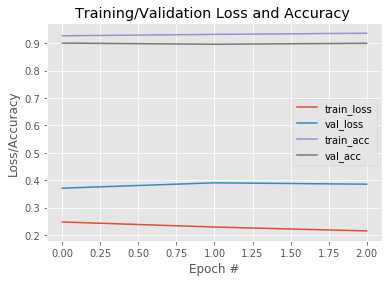

In [0]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 3), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 3), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 3), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, 3), history.history["val_acc"], label="val_acc")
plt.title("Training/Validation Loss and Accuracy ")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()